In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
from utils import ELEMENTS_NAMES, ELEMENTS_UNITS

figures_dir = "../figures/climate"

os.makedirs(figures_dir, exist_ok=True)

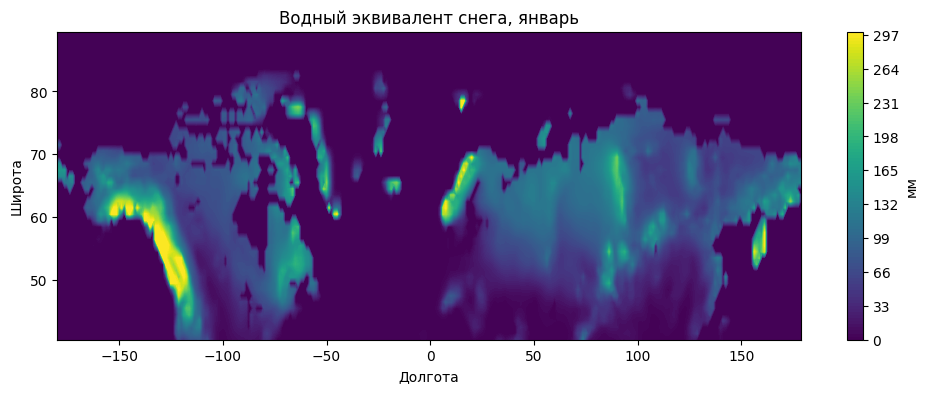

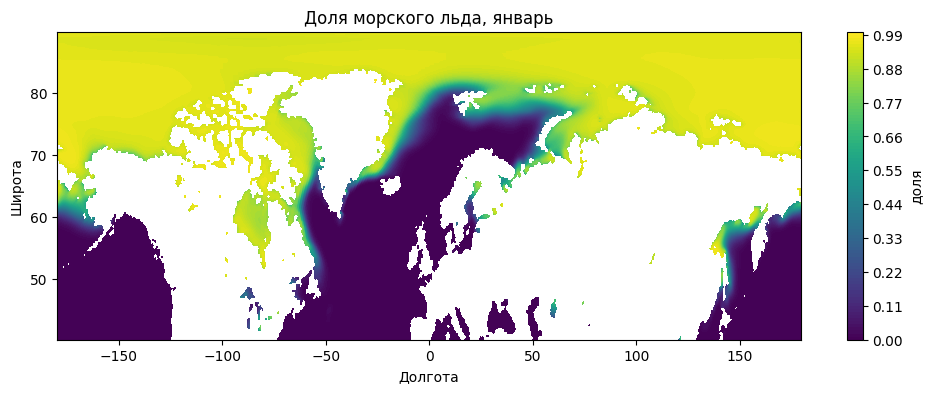

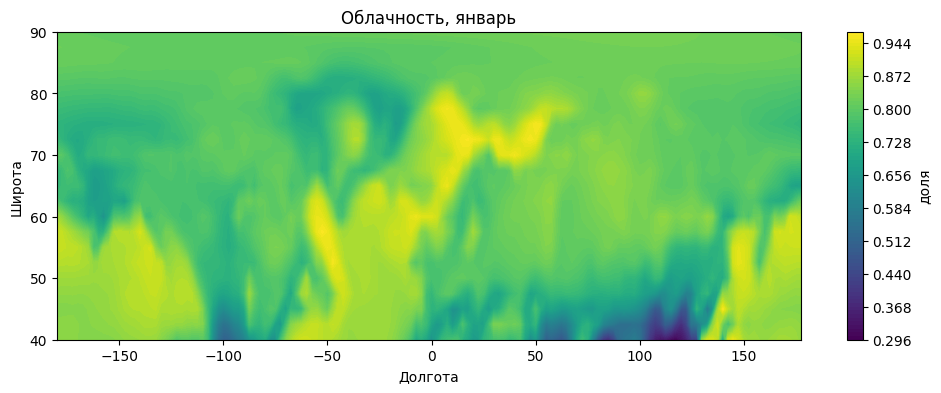

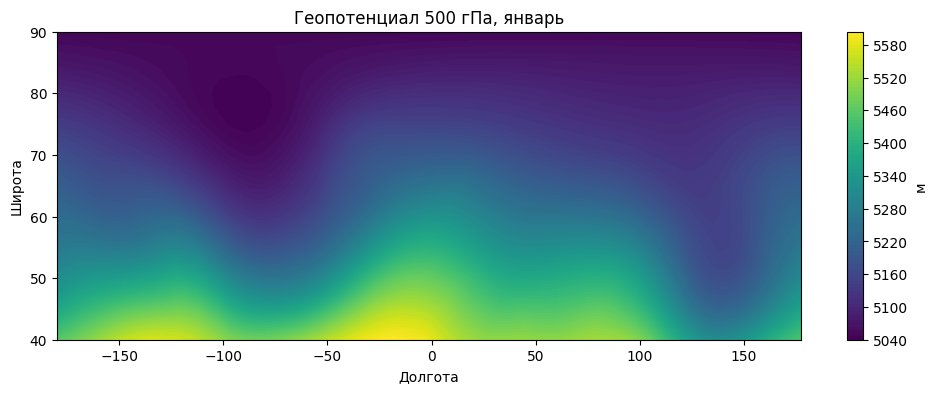

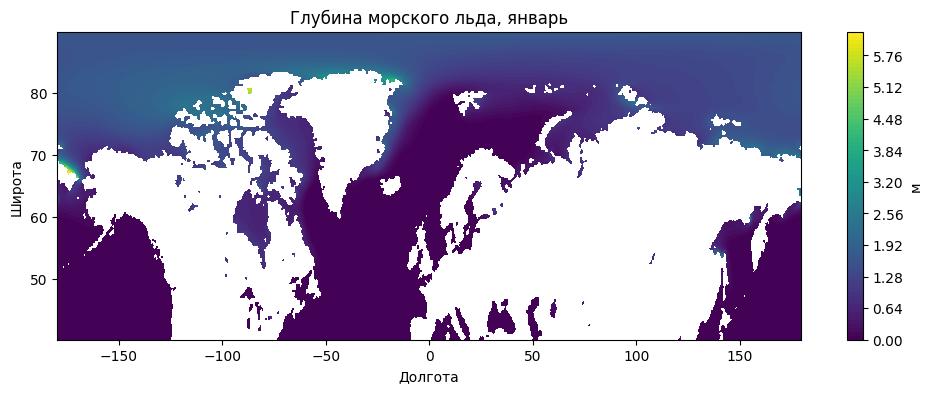

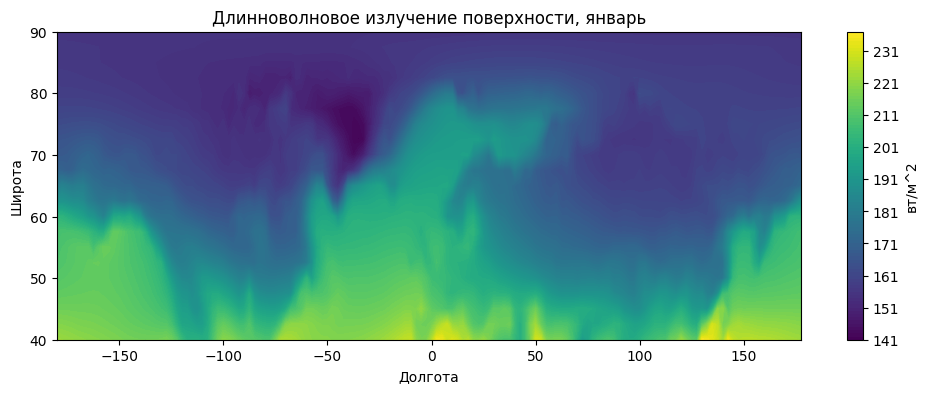

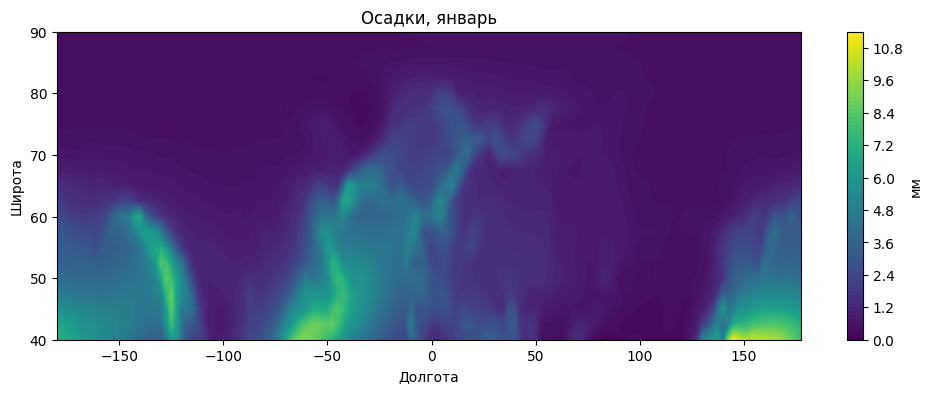

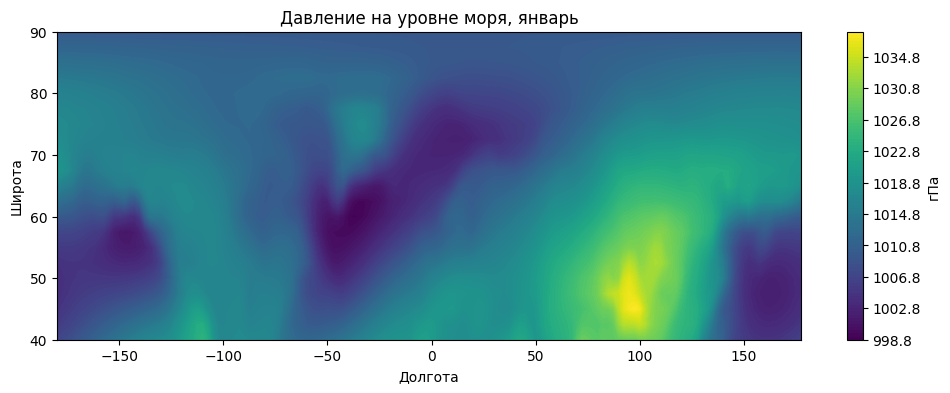

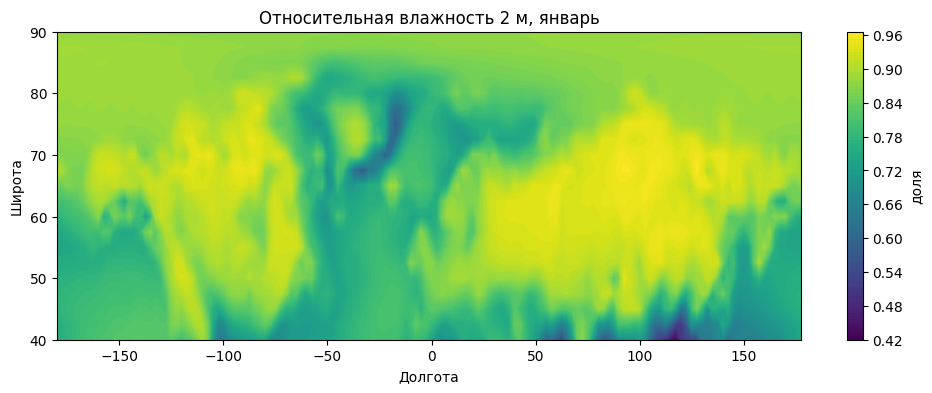

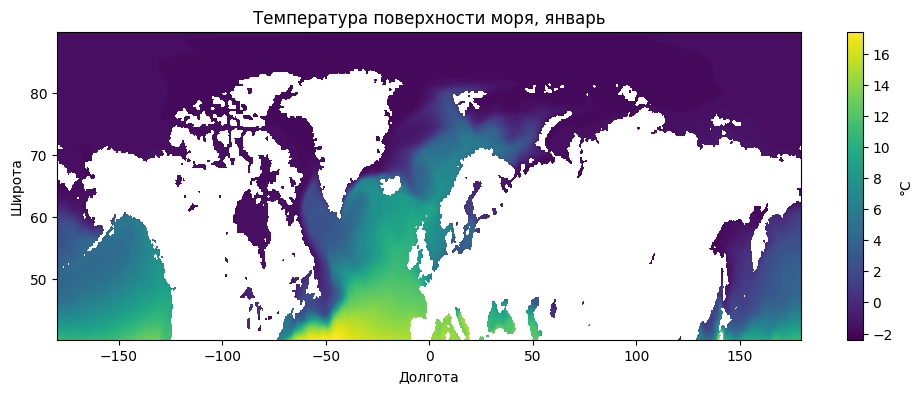

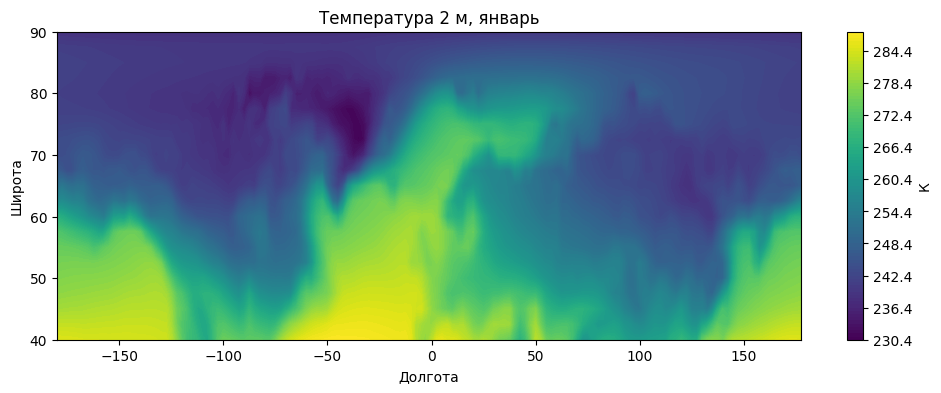

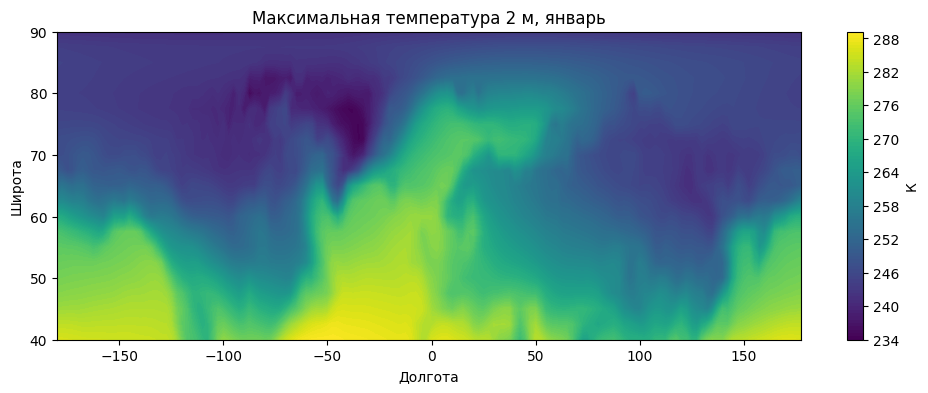

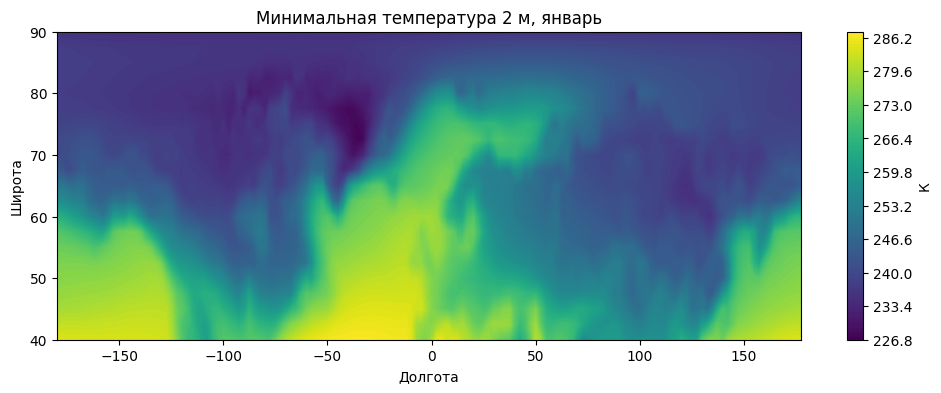

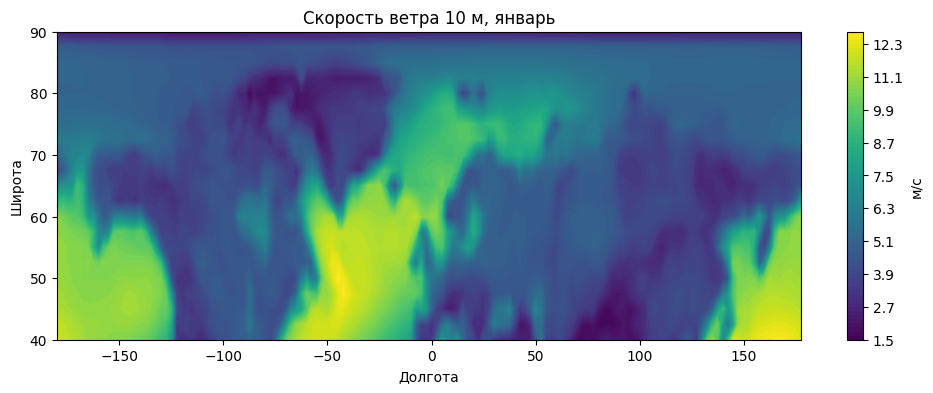

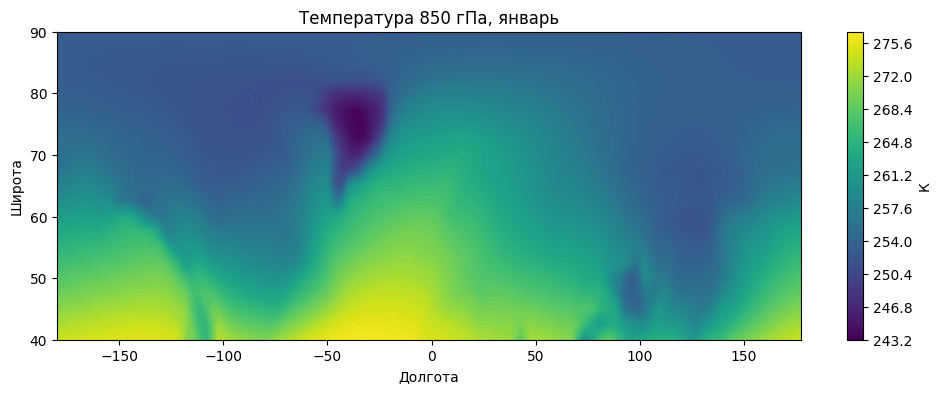

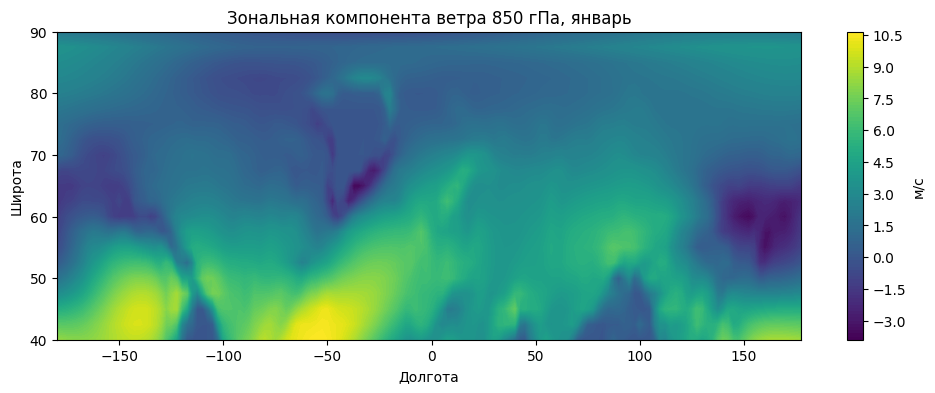

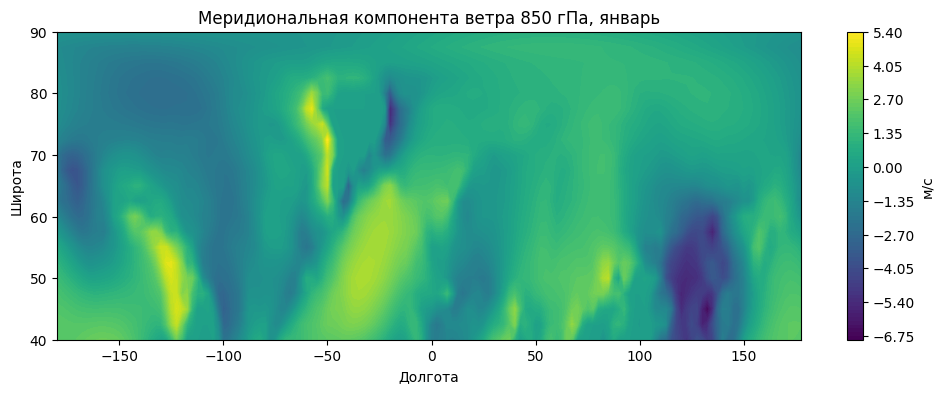

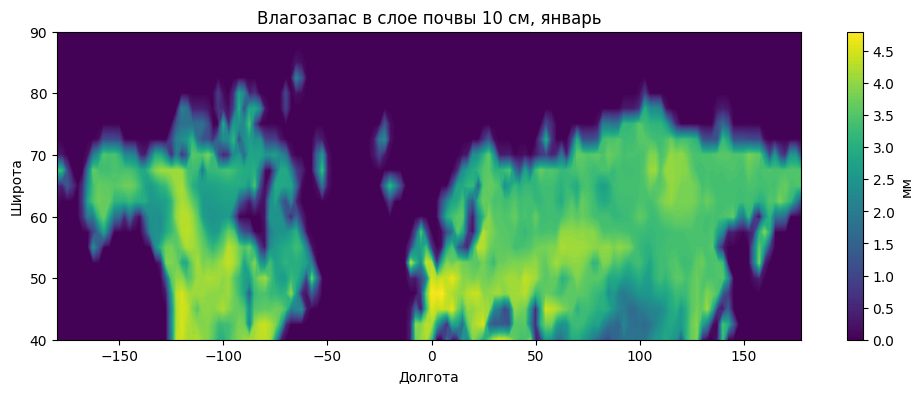

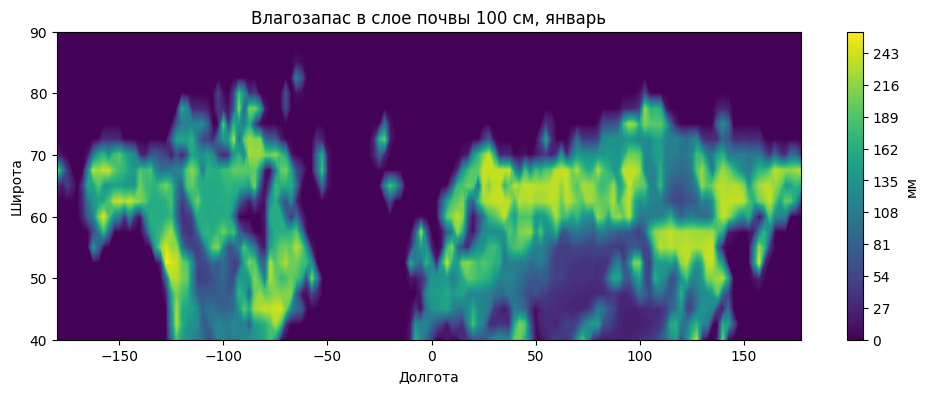

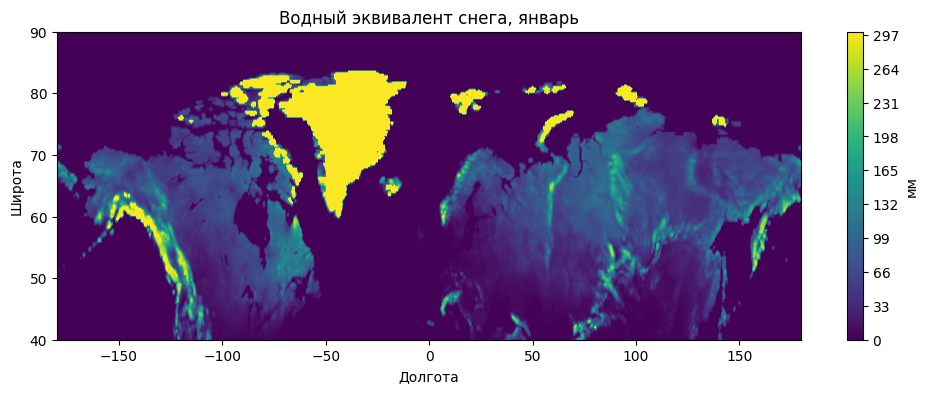

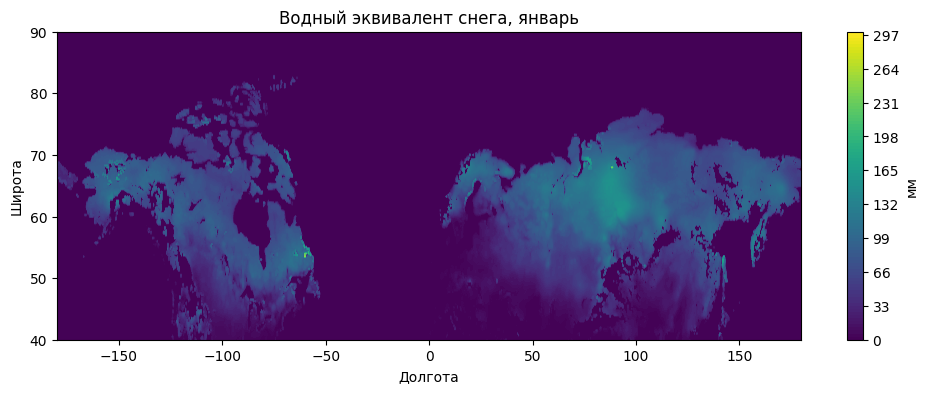

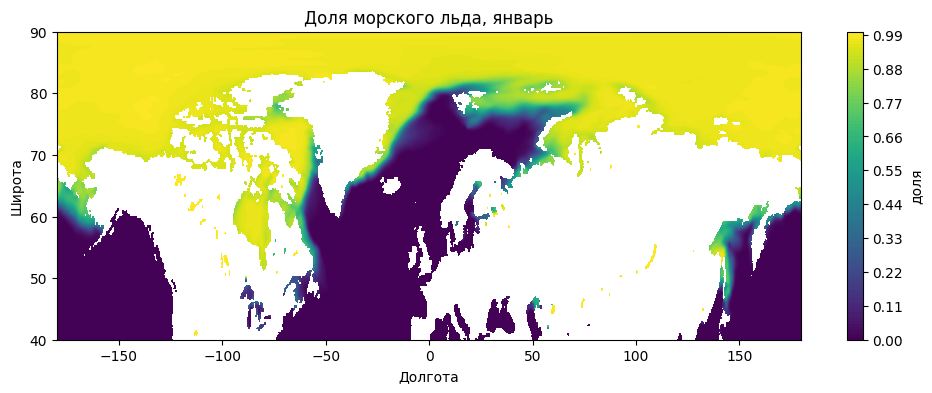

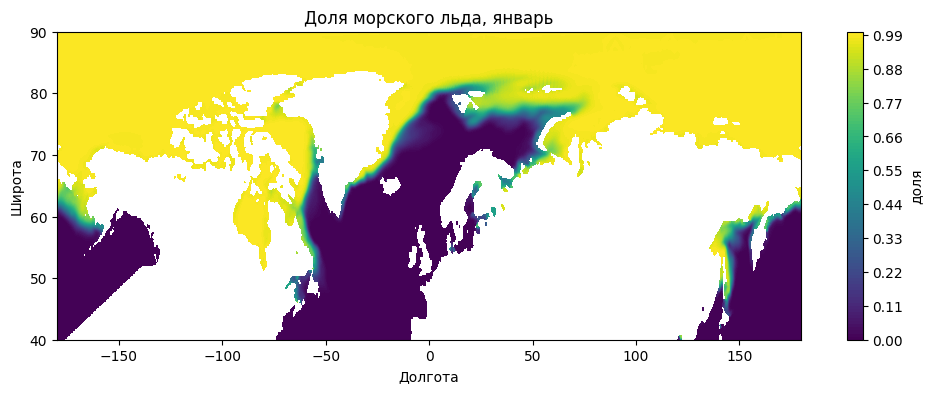

In [2]:
for element in ['swe', 'aice', 'cld', 'h500', 'hice', 'olr', 'prec', 'ps',
                'rq2', 'sst', 't2', 't2max', 't2min', 'uv10', 't850', 'u850', 'v850',
                'ws', 'ww', 'era5_swe', 'globsnow', 'era5_ice', 'noaa_ice']:
    element_var, name = element, element
    if element == 'era5_swe' or element == 'globsnow':
        element_var = 'swe'
        name = 'swe_era5' if element == 'era5_swe' else 'swe_globsnow'
    elif element == 'era5_ice' or element == 'noaa_ice':
        element_var = 'ice'
        name = 'aice_era5' if element == 'era5_ice' else 'aice_noaa'
    if element_var == 'swe':
        ds = xr.open_dataset(f"../data/climate/week/{element}/01.nc", engine="h5netcdf")
    else:
        ds = xr.open_dataset(f"../data/climate/month/{element}/01.nc", engine="h5netcdf")
    plt.figure(figsize=(12, 4))
    plt.title(ELEMENTS_NAMES[element_var] + ", январь")
    plt.xlabel("Долгота")
    plt.ylabel("Широта")
    if element_var == 'swe':
        levels = np.linspace(0, 300, 101)
        values = np.minimum(ds[element_var].values, 300)
        values[np.isnan(values)] = 0
    else:
        levels = np.linspace(0, 1, 101) if element_var == 'ice' or element_var == 'aice' else 101
        values = ds[element_var].values
    plt.contourf(ds.lon.values, ds.lat.values, values, levels)
    cb = plt.colorbar()
    cb.set_label(ELEMENTS_UNITS[element_var])
    plt.savefig(f'{figures_dir}/{name}.png', dpi=150, bbox_inches='tight')
    plt.show()